In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
import math

In [2]:
# training data set is too large to calculate on local
# as a reulst, only partial data are read in to train the model
n = sum(1 for line in open('train.csv')) - 1 # number of records in file (excludes header)
s = 5000000
skip = sorted(random.sample(range(1,n+1),n-s))
df = pd.read_csv('train.csv', header=0, skiprows=skip)

In [3]:
test = pd.read_csv('test.csv', header=0)

# explore data

In [4]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-08-18 00:35:00.00000049,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
1,2012-12-03 13:10:00.000000125,9.00,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
2,2009-09-02 01:11:00.00000083,8.90,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2
3,2010-09-07 13:18:00.000000175,10.50,2010-09-07 13:18:00 UTC,-73.985382,40.747858,-73.978377,40.762070,1
4,2015-06-21 21:46:34.0000001,22.54,2015-06-21 21:46:34 UTC,-74.010483,40.717667,-73.985771,40.660366,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 305.2+ MB


In [6]:
df.isna().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    34
dropoff_latitude     34
passenger_count       0
dtype: int64

In [7]:
# since this is a big dataset, I decided to delete data that contains NAs
print('Old data size:', len(df))
df = df.dropna()
print('New data size:', len(df))

Old data size: 5000000
New data size: 4999966


In [8]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4.999966e+06,4.999966e+06,4.999966e+06,4.999966e+06,4.999966e+06,4.999966e+06
mean,1.137477e+01,-7.250755e+01,3.991831e+01,-7.250946e+01,3.991598e+01,1.685542e+00
std,5.117573e+01,1.261338e+01,9.733245e+00,1.245139e+01,9.910545e+00,1.322697e+00
min,-3.000000e+02,-3.408459e+03,-3.474112e+03,-3.386063e+03,-3.474112e+03,0.000000e+00
25%,6.000000e+00,-7.399206e+01,4.073495e+01,-7.399140e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398179e+01,4.075266e+01,-7.398015e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396704e+01,4.076715e+01,-7.396367e+01,4.076809e+01,2.000000e+00
max,9.396336e+04,3.412910e+03,3.319334e+03,2.874608e+03,3.338879e+03,2.080000e+02


In [9]:
# delete longitude that are considered outliers
# from the description above, 25% and 75% of longitude shows that the data are mostly 
# around -74
print('Old data size:',len(df))
df = df[df.pickup_longitude>-75]
df = df[df.dropoff_longitude>-75]
df = df[df.pickup_longitude<-72]
df = df[df.dropoff_longitude<-72]
print('New data size:', len(df))

Old data size: 4999966
New data size: 4895913


In [10]:
# delete latitude that are considered outliers
# from the description above, 25% and 75% of latitude shows that the data are mostly 
# around 41
print('Old data size:',len(df))
df = df[df.pickup_latitude>40]
df = df[df.dropoff_latitude>40]
df = df[df.pickup_latitude<42]
df = df[df.dropoff_latitude<42]
print('New data size:', len(df))

Old data size: 4895913
New data size: 4894700


In [11]:
# delete fare_amount that are less than $1
print('Old data size:',len(df))
df = df[df.fare_amount>1]
print('New data size:', len(df))

Old data size: 4894700
New data size: 4894329


In [12]:
df.passenger_count.unique()

array([  2,   1,   4,   3,   5,   6,   0, 129,   9,   8, 208])

In [13]:
# delete passenger_count that are considered unreasonable
print('Old data size:',len(df))
df = df[df.passenger_count<9]
print('New data size:', len(df))

Old data size: 4894329
New data size: 4894324


# map 

In [14]:
# https://www.openstreetmap.org/export#map=8/41.011/-74.185
L = (-75, -72, 40, 42,)
nyc_map = plt.imread('nymap.png')

In [15]:
def plot_map(df, latitude, logitude, L, nyc_map, title):
    plt.figure(figsize=(10,5))
    plt.scatter(data=df, y=latitude, x=logitude, s=1)
    plt.set_xlim=((L[2], L[3]))
    plt.set_ylim=((L[0], L[1]))
    plt.imshow(nyc_map, zorder=0, extent=L)
    plt.title(title)

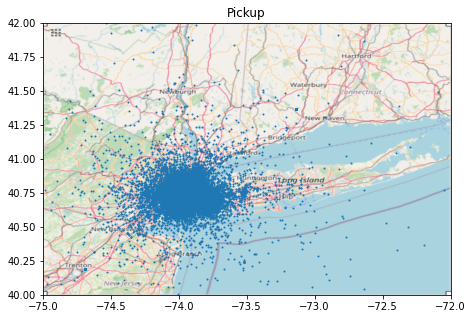

In [16]:
plot_map(df, 'pickup_latitude', 'pickup_longitude', L, nyc_map, 'Pickup')

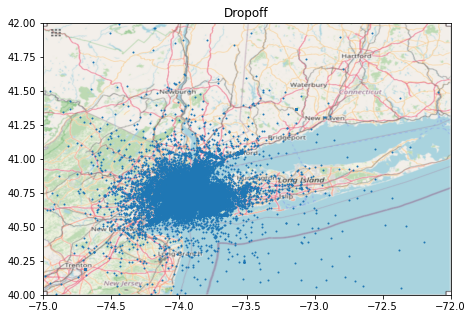

In [17]:
plot_map(df, 'dropoff_latitude', 'dropoff_longitude', L, nyc_map, 'Dropoff')

In [18]:
# the above maps show that some data are on water
# as a result, I want to delete the data that are on water

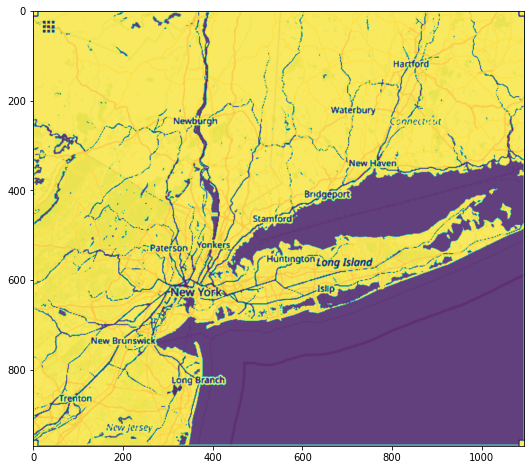

In [19]:
# the below map classifies between water and land
water_land = plt.imread('nymap.png')[:,:,0] > 0.7
plt.figure(figsize=(10,8))
plt.imshow(nyc_map, zorder=0)
plt.imshow(water_land, alpha=0.7)

In [20]:
water_land.shape

(970, 1096)

In [21]:
# transfer longitude and latitude into x and y on the map
# y needs to subtract from shape_y b/c its y-value is reversed (from 970 to 0)
def lonlat_to_xy(longitude, latitude, shape_x, shape_y, L):
    x = (shape_x * (longitude - L[0]) / (L[1] - L[0])).astype('int')
    y = (shape_y - (shape_y * (latitude - L[2]) / (L[3] - L[2]))).astype('int')
    return x, y

In [22]:
# True = land, False = water
water_land = plt.imread('nymap.png')[:,:,0] > 0.7
water_land

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [23]:
df['pickup_x'], df['pickup_y'] = lonlat_to_xy(df['pickup_longitude'], 
                                              df['pickup_latitude'], 
                                              water_land.shape[1],
                                              water_land.shape[0], 
                                              L)
df['dropoff_x'], df['dropoff_y'] = lonlat_to_xy(df['dropoff_longitude'], 
                                                df['dropoff_latitude'],
                                                water_land.shape[1],
                                                water_land.shape[0],
                                                L)

In [24]:
# select data that are on land
idx = water_land[df.pickup_y, df.pickup_x] & water_land[df.dropoff_y, df.dropoff_x]
print('Old data size:',len(df))
df = df[idx]
print('New data size:',len(df))

Old data size: 4894324
New data size: 2083389


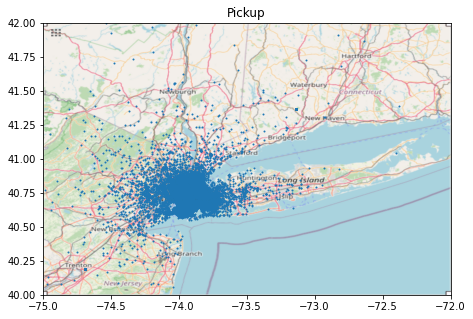

In [25]:
plot_map(df, 'pickup_latitude', 'pickup_longitude', L, nyc_map, 'Pickup')

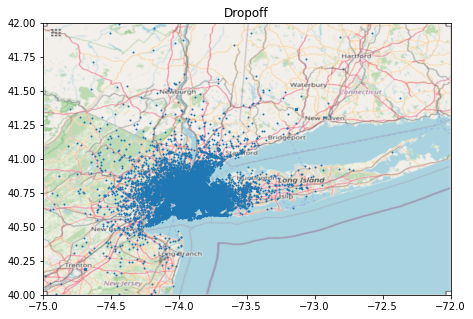

In [26]:
plot_map(df, 'dropoff_latitude', 'dropoff_longitude', L, nyc_map, 'Dropoff')

# distance

In [27]:
# this is only an estimate of miles, since this can only calculate distance in straight 
# line instead of the exact travel distace
# https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula
def distance(df):
    x1 = df.pickup_longitude
    y1 = df.pickup_latitude
    x2 = df.dropoff_longitude
    y2 = df.dropoff_latitude
    p = math.pi/180 
    a = 0.5 - np.cos((y2 - y1) * p)/2 + np.cos(y1 * p) * np.cos(y2 * p) * (1 - np.cos((x2 - x1) * p)) / 2
    d = 12742 * np.arcsin(np.sqrt(a)) / 1.609344
    return d

In [28]:
df['distance'] = distance(df)

In [29]:
test['distance'] = distance(test)

<AxesSubplot:xlabel='distance', ylabel='fare_amount'>

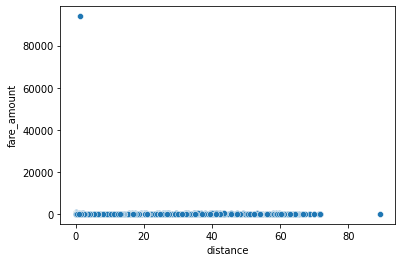

In [30]:
sns.scatterplot(x='distance', y='fare_amount', data=df)

In [31]:
# delete outliers
print('Old data size:',len(df))
df = df[df.fare_amount<800]
print('New data size:', len(df))

Old data size: 2083389
New data size: 2083387


<AxesSubplot:xlabel='distance', ylabel='fare_amount'>

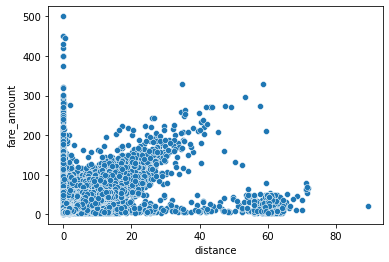

In [32]:
sns.scatterplot(x='distance', y='fare_amount', data=df)

In [33]:
df[['fare_amount', 'distance']].corr()

,fare_amount,distance
fare_amount,1.000000,0.808733
distance,0.808733,1.000000


# fare_per_distance

In [34]:
df['fare_per_distance'] = df['fare_amount'] / df['distance']

In [35]:
print('Old data size:',len(df))
df = df[df.fare_per_distance>1]
print('New data size:', len(df))

Old data size: 2083387
New data size: 2080533


# time

In [36]:
df['time'] = df['pickup_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S UTC') - timedelta(hours=5))

In [37]:
test['time'] = test['pickup_datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S UTC') - timedelta(hours=5))

In [38]:
# year

In [39]:
df['year'] = df['time'].apply(lambda x: str(x).split('-')[0])
df['year'] = df['year'].apply(lambda x: int(x))

In [40]:
test['year'] = test['time'].apply(lambda x: str(x).split('-')[0])
test['year'] = test['year'].apply(lambda x: int(x))

<AxesSubplot:xlabel='year', ylabel='fare_per_distance'>

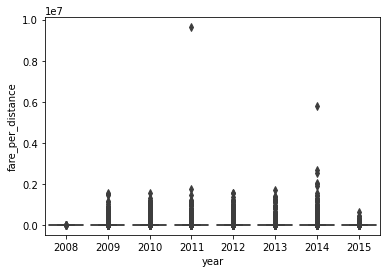

In [41]:
sns.boxplot(x='year', y='fare_per_distance', data=df)

In [42]:
# delete outliers
print('Old data size:',len(df))
df = df[df.fare_per_distance<13]
#df = df[df.fare_per_distance<780]
print('New data size:', len(df))

Old data size: 2080533
New data size: 1906021


<AxesSubplot:xlabel='year', ylabel='fare_per_distance'>

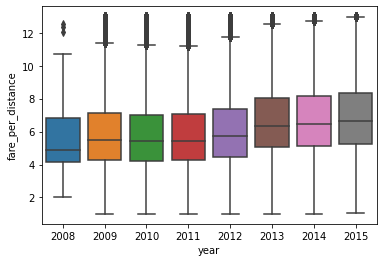

In [43]:
sns.boxplot(x='year', y='fare_per_distance', data=df)

In [44]:
#month

In [45]:
df['month'] = df['time'].apply(lambda x: str(x).split('-')[1].split('-')[0])
df['month'] = df['month'].apply(lambda x: int(x))

In [46]:
test['month'] = test['time'].apply(lambda x: str(x).split('-')[1].split('-')[0])
test['month'] = test['month'].apply(lambda x: int(x))

<AxesSubplot:xlabel='month', ylabel='fare_per_distance'>

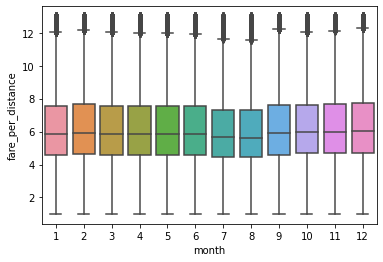

In [47]:
sns.boxplot(x='month', y='fare_per_distance', data=df)

In [48]:
# hour

In [49]:
df['hour'] = df['time'].apply(lambda x: str(x).split(' ')[1].split(':')[0])
df['hour'] = df['hour'].apply(lambda x: int(x))

In [50]:
test['hour'] = test['time'].apply(lambda x: str(x).split(' ')[1].split(':')[0])
test['hour'] = test['hour'].apply(lambda x: int(x))

<AxesSubplot:xlabel='hour', ylabel='fare_per_distance'>

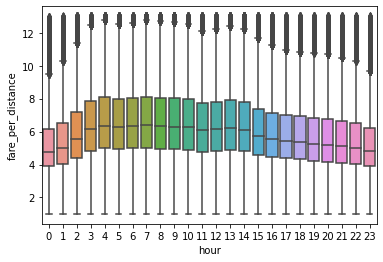

In [51]:
sns.boxplot(x='hour', y='fare_per_distance', data=df)

In [52]:
# day of the week

In [53]:
df['day_of_week'] = df['time'].apply(lambda x: x.weekday())
# Monday is 0 and Sunday is 6

In [54]:
test['day_of_week'] = test['time'].apply(lambda x: x.weekday())

<AxesSubplot:xlabel='day_of_week', ylabel='fare_per_distance'>

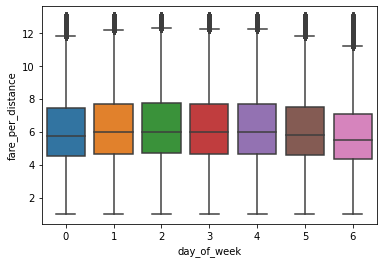

In [55]:
sns.boxplot(x='day_of_week', y='fare_per_distance', data=df)

# summary

In [56]:
df.pivot_table('fare_per_distance', index='hour', columns='year')

year,2008,2009,2010,2011,2012,2013,2014,2015
hour,,,,,,,,
0,NaN,5.010732,4.959029,4.842543,5.163979,5.683077,5.656029,5.650376
1,NaN,5.134309,5.114576,5.116719,5.384746,5.948337,5.932670,6.063257
2,NaN,5.577973,5.551073,5.582599,5.896826,6.453949,6.500339,6.593722
3,NaN,6.076264,6.027263,6.092874,6.390199,7.038959,7.175061,7.313311
4,NaN,6.308232,6.208095,6.297111,6.594079,7.249452,7.323223,7.470297
5,NaN,6.162475,6.099583,6.231719,6.477818,7.149402,7.317823,7.440805
6,NaN,6.270200,6.182860,6.242333,6.526016,7.197853,7.317182,7.449400
7,NaN,6.326087,6.279479,6.355724,6.602142,7.271950,7.345278,7.417751
8,NaN,6.315132,6.197731,6.267730,6.552488,7.155066,7.337870,7.430207


# TRAINING AND TESTING

# split train/validate data

In [57]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, train_size=0.7, random_state=13)

# decision tree + linear regression

- decision tree is used to determine which year and hour the data is in
- then each year and month has its own linear regression

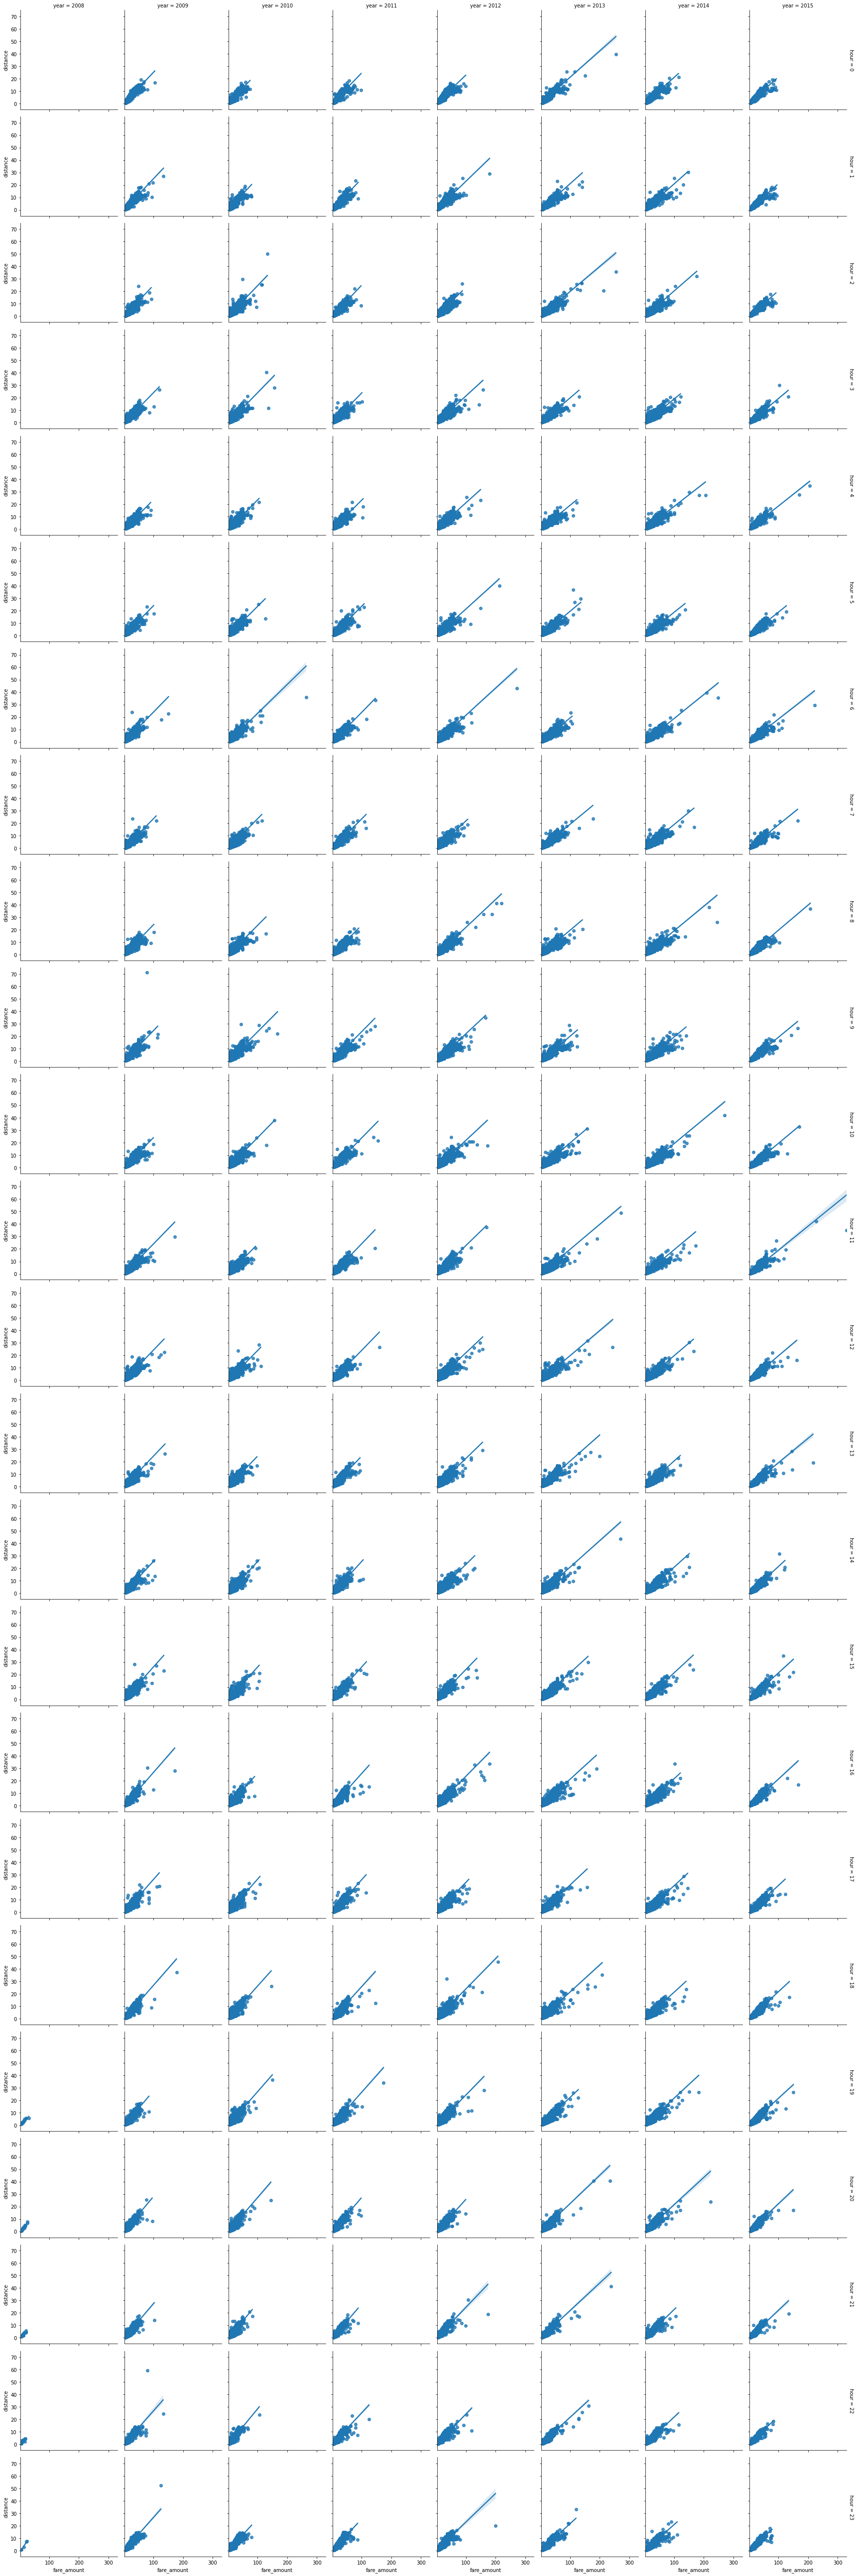

In [58]:
g = sns.FacetGrid(train, row="hour", col="year", margin_titles=True)
g.map(sns.regplot, "fare_amount", "distance")

In [59]:
# train model

In [60]:
from sklearn.linear_model import LinearRegression
for year in train.year.unique():
    df_year = train[train.year==year]
    for hour in df_year.hour.unique():
        df_hour = df_year[df_year.hour==hour]
        x_linear = df_hour.loc[:, ['distance']]
        y_linear = df_hour.loc[:, ['fare_amount']]
        exec(f'reg_{year}_{hour} = LinearRegression().fit(x_linear, y_linear)')

In [61]:
# validate

In [62]:
val_linear = val.copy()
val_linear['pred'] = 0.0

In [63]:
for year in val_linear.year.unique():
    df_year = train[train.year==year]
    for hour in df_year.hour.unique():
        exec(f'val_linear.loc[(val_linear.year==year)&(val_linear.hour==hour), ["pred"]] = reg_{year}_{hour}.predict(val_linear.loc[(val_linear.year==year)&(val_linear.hour==hour), ["distance"]])')

In [64]:
val_linear['pred'] = val_linear['pred'].apply(lambda x: round(x,1))

In [66]:
# verify
from sklearn.metrics import mean_squared_error
from math import sqrt
y_val_linear = val_linear.fare_amount
reg_predict = val_linear.pred
reg_rmse = sqrt(mean_squared_error(y_val_linear, reg_predict))
print('RMSE:', reg_rmse)

RMSE: 3.6022617837998165


# predict for test set: linear regression

In [67]:
test_linear = test.copy()
test_linear['fare_amount'] = 0.0

In [68]:
for year in test_linear.year.unique():
    df_year = test_linear[test_linear.year==year]
    for hour in df_year.hour.unique():
        exec(f'test_linear.loc[(test_linear.year==year)&(test_linear.hour==hour), ["fare_amount"]] = reg_{year}_{hour}.predict(test_linear.loc[(test_linear.year==year)&(test_linear.hour==hour), ["distance"]])')

In [69]:
test_linear['fare_amount'] = test_linear['fare_amount'].apply(lambda x: round(x,1))

In [70]:
test_linear[['key','fare_amount']].to_csv('prediction1_linear.csv', index=False)

# xgboost

In [71]:
# train

In [72]:
from xgboost import XGBRegressor
from xgboost import plot_importance

In [73]:
model = XGBRegressor(n_estimators=100,
                     learning_rate = 0.1,
                     max_depth = 6,
                     random_state=42,
                     n_jobs = -1,
                     early_stopping_rounds=10)

In [74]:
x_xg = train.drop(["fare_amount", "pickup_datetime", "key", "time", "fare_per_distance", 'pickup_x', 'pickup_y', 'dropoff_x', 'dropoff_y'],axis = 1)
y_xg = train["fare_amount"]
x_val_xg = val.drop(["fare_amount", "pickup_datetime", "key", "time", "fare_per_distance", 'pickup_x', 'pickup_y', 'dropoff_x', 'dropoff_y'],axis = 1)
y_val_xg = val["fare_amount"]

In [75]:
model.fit(x_xg, y_xg, eval_metric="rmse", verbose=True)

[14:45:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [76]:
from sklearn.metrics import mean_squared_error
y_val_pred = model.predict(x_val_xg)
y_val_pred = np.round(y_val_pred, 1)
print('RMSE:', np.sqrt(mean_squared_error(y_val_pred, y_val_xg)))

RMSE: 2.7225413097690816


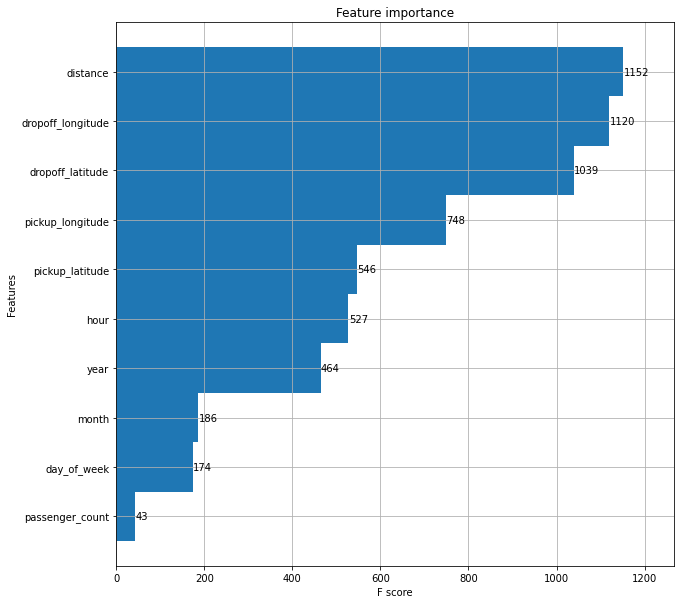

In [77]:
figsize=(10,10)
fig, ax = plt.subplots(1,1,figsize=figsize)
plot_importance(model,ax = ax,height = 1)
plt.show()

# predict for test set: xgboost

In [78]:
test_xg = test.copy()

In [79]:
x_test = test.drop(["pickup_datetime", "key", "time"], axis = 1)
y_test_pred = model.predict(x_test)

In [80]:
test['fare_amount'] = y_test_pred

In [81]:
test['fare_amount'] = test['fare_amount'].apply(lambda x: round(x,1))

In [82]:
test[['key','fare_amount']].to_csv('prediction2_xgboost.csv', index=False)